# Predição: Uma semana covid 19

In [0]:
import pandas as pd

In [8]:
covid_data = pd.read_csv('brazil2.csv')
covid_data.tail(10)

,_id,totalCases,newCases,activeCases,totalDeaths,newDeaths,totalRecovered,date,__v
43,"ObjectId(""5e9d1bee6237ec130a9e6b9f"")",20727,1089,19430,1124,67,173,"2020-04-11T00:00:00.000Z""""",0
44,"ObjectId(""5e9d1bee6237ec130a9e6ba0"")",22192,1465,20796,1223,99,173,"2020-04-12T00:00:00.000Z""""",0
45,"ObjectId(""5e9d1bee6237ec130a9e6ba1"")",23430,1238,21929,1328,105,173,"2020-04-13T00:00:00.000Z""""",0
46,"ObjectId(""5e9d1bee6237ec130a9e6ba2"")",25262,1832,20684,1532,204,3046,"2020-04-14T00:00:00.000Z""""",0
47,"ObjectId(""5e9d1bee6237ec130a9e6ba3"")",28320,3058,12558,1736,204,14026,"2020-04-15T00:00:00.000Z""""",0
48,"ObjectId(""5e9d1bee6237ec130a9e6ba4"")",30425,2105,14475,1924,188,14026,"2020-04-16T00:00:00.000Z""""",0
49,"ObjectId(""5e9d1bee6237ec130a9e6ba5"")",33682,3257,17515,2141,217,14026,"2020-04-17T00:00:00.000Z""""",0
50,"ObjectId(""5e9d1bee6237ec130a9e6ba6"")",36658,2976,20278,2354,213,14026,"2020-04-18T00:00:00.000Z""""",0
51,"ObjectId(""5e9d1bee6237ec130a9e6ba7"")",38654,1996,14062,2462,108,22130,"2020-04-19T00:00:00.000Z""""",0
52,"ObjectId(""5e9d6ae7b7cd6921b2f9626c"")",40581,1927,15936,2575,113,22130,"2020-04-20T00:00:00.000Z""""",0


### Normalização da data 

In [0]:
def normalizer_date(date):
    result = ''
    for i in range(10):
        result += date[i]
    return result
covid_data['date'] = covid_data.date.apply(normalizer_date)

In [10]:
covid_data.head(5)

,_id,totalCases,newCases,activeCases,totalDeaths,newDeaths,totalRecovered,date,__v
0,"ObjectId(""5e9d1bee6237ec130a9e6b75"")",2,1,2,0,0,0,2020-02-29,0
1,"ObjectId(""5e9d1bee6237ec130a9e6b74"")",1,1,1,0,0,0,2020-02-28,0
2,"ObjectId(""5e9d1bee6237ec130a9e6b76"")",2,0,2,0,0,0,2020-03-01,0
3,"ObjectId(""5e9d1bee6237ec130a9e6b78"")",2,0,2,0,0,0,2020-03-03,0
4,"ObjectId(""5e9d1bee6237ec130a9e6b7a"")",4,0,4,0,0,0,2020-03-05,0


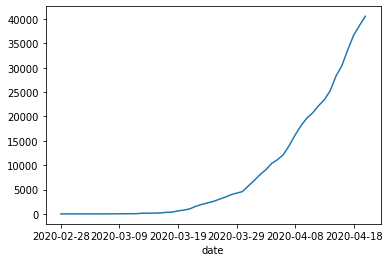

In [11]:
covid_data.groupby('date').sum()['totalCases'].plot()

In [0]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [0]:
from fbprophet import Prophet


### Dataframe com novas mortes por dia

In [17]:
covid_newDeaths = covid_data[['date','newDeaths']]
covid_newDeaths.tail(7)

,date,newDeaths
46,2020-04-14,204
47,2020-04-15,204
48,2020-04-16,188
49,2020-04-17,217
50,2020-04-18,213
51,2020-04-19,108
52,2020-04-20,113


In [18]:
covid_newDeaths.columns = ['ds','y']
covid_newDeaths.tail()

,ds,y
48,2020-04-16,188
49,2020-04-17,217
50,2020-04-18,213
51,2020-04-19,108
52,2020-04-20,113


In [0]:
m = Prophet(interval_width= 0.90)
m.fit(covid_newDeaths)
predicao = m.make_future_dataframe(periods=7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
predicao.head(7)

,ds
0,2020-02-28
1,2020-02-29
2,2020-03-01
3,2020-03-02
4,2020-03-03
5,2020-03-04
6,2020-03-05


In [0]:
previsao = m.predict(predicao)
previsao.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
53,2020-04-21,145.987975,97.704884,211.948321,145.987481,145.988463,8.988462,8.988462,8.988462,8.988462,8.988462,8.988462,0.0,0.0,0.0,154.976437
54,2020-04-22,149.583175,102.165893,213.780518,149.581447,149.584854,6.830182,6.830182,6.830182,6.830182,6.830182,6.830182,0.0,0.0,0.0,156.413357
55,2020-04-23,153.178375,106.651483,216.240622,153.175136,153.181751,7.956112,7.956112,7.956112,7.956112,7.956112,7.956112,0.0,0.0,0.0,161.134486
56,2020-04-24,156.773575,104.522662,214.836930,156.768749,156.779171,3.715902,3.715902,3.715902,3.715902,3.715902,3.715902,0.0,0.0,0.0,160.489477
57,2020-04-25,160.368774,106.025040,223.007155,160.362123,160.376458,1.379034,1.379034,1.379034,1.379034,1.379034,1.379034,0.0,0.0,0.0,161.747809
58,2020-04-26,163.963974,89.904542,203.221228,163.954763,163.974001,-15.452983,-15.452983,-15.452983,-15.452983,-15.452983,-15.452983,0.0,0.0,0.0,148.510992
59,2020-04-27,167.559174,97.801526,210.909871,167.547345,167.571726,-13.416709,-13.416709,-13.416709,-13.416709,-13.416709,-13.416709,0.0,0.0,0.0,154.142465


In [0]:
data = previsao[['ds','yhat_lower','yhat','yhat_upper']].tail(7)

In [0]:
data.columns = ['data','previsao_baixa','previsao_media','previsao_alta']

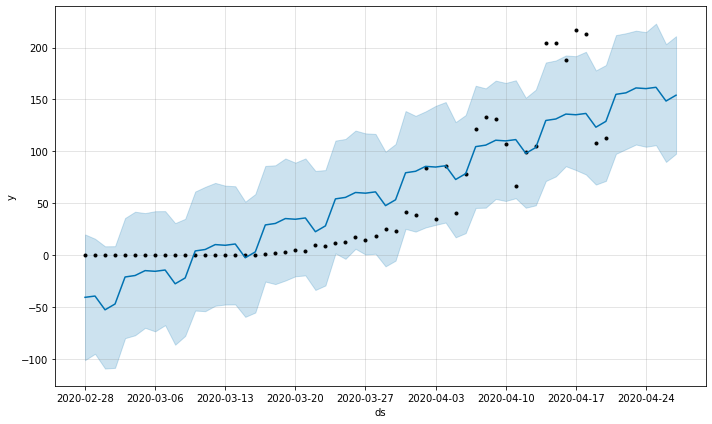

In [0]:
confirmed_forescast_plot = m.plot(previsao)

In [0]:
def normalizer_results(d):
    result = int(d)
    return result

In [0]:
type(data)

pandas.core.frame.DataFrame

# Previsão de mortes Covid-19

In [0]:
data['previsao_baixa'] = data.previsao_baixa.apply(normalizer_results)
data['previsao_media'] = data.previsao_media.apply(normalizer_results)
data['previsao_alta'] = data.previsao_alta.apply(normalizer_results)
data

,data,previsao_baixa,previsao_media,previsao_alta
53,2020-04-21,97,154,211
54,2020-04-22,102,156,213
55,2020-04-23,106,161,216
56,2020-04-24,104,160,214
57,2020-04-25,106,161,223
58,2020-04-26,89,148,203
59,2020-04-27,97,154,210
